# Projet 2 - Youtube --Fred--

### Import des modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Import des données

##### Data

In [2]:
data_fr = pd.read_csv("data/FRvideos.csv")
data_us = pd.read_csv("data/USvideos.csv")

In [3]:
print(data_us.shape)
data_us.head(2)

(40949, 16)


,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."


In [4]:
print(data_fr.shape)
data_fr.head(2)

(40724, 16)


,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,Ro6eob0LrCY,17.14.11,Malika LePen : Femme de Gauche - Trailer,Le Raptor Dissident,24,2017-11-13T17:32:55.000Z,"Raptor""|""Dissident""|""Expliquez""|""moi""|""cette""|...",212702,29282,1108,3817,https://i.ytimg.com/vi/Ro6eob0LrCY/default.jpg,False,False,False,Dimanche.\n18h30.\nSoyez présents pour la vidé...
1,Yo84eqYwP98,17.14.11,"LA PIRE PARTIE ft Le Rire Jaune, Pierre Croce,...",Le Labo,24,2017-11-12T15:00:02.000Z,[none],432721,14053,576,1161,https://i.ytimg.com/vi/Yo84eqYwP98/default.jpg,False,False,False,Le jeu de société: https://goo.gl/hhG1Ta\n\nGa...


##### Catégories

In [5]:
cat_fr = pd.read_json("data/FR_category_id.json")
cat_us = pd.read_json("data/US_category_id.json")

##### Mise en listes

In [6]:
list_cat_fr = []
for x in range(cat_fr.shape[0]):
    d = cat_fr.iloc[x,2]["snippet"]["title"]
    list_cat_fr.append(d)
print(list_cat_fr)

['Film & Animation', 'Autos & Vehicles', 'Music', 'Pets & Animals', 'Sports', 'Short Movies', 'Travel & Events', 'Gaming', 'Videoblogging', 'People & Blogs', 'Comedy', 'Entertainment', 'News & Politics', 'Howto & Style', 'Education', 'Science & Technology', 'Movies', 'Anime/Animation', 'Action/Adventure', 'Classics', 'Comedy', 'Documentary', 'Drama', 'Family', 'Foreign', 'Horror', 'Sci-Fi/Fantasy', 'Thriller', 'Shorts', 'Shows', 'Trailers']


In [7]:
list_cat_us = []
for x in range(cat_us.shape[0]):
    d = cat_us.iloc[x,2]["snippet"]["title"]
    list_cat_us.append(d)
print(list_cat_us)

['Film & Animation', 'Autos & Vehicles', 'Music', 'Pets & Animals', 'Sports', 'Short Movies', 'Travel & Events', 'Gaming', 'Videoblogging', 'People & Blogs', 'Comedy', 'Entertainment', 'News & Politics', 'Howto & Style', 'Education', 'Science & Technology', 'Nonprofits & Activism', 'Movies', 'Anime/Animation', 'Action/Adventure', 'Classics', 'Comedy', 'Documentary', 'Drama', 'Family', 'Foreign', 'Horror', 'Sci-Fi/Fantasy', 'Thriller', 'Shorts', 'Shows', 'Trailers']


### Modifications des data sets

##### Modification d'index

In [8]:
data_fr = data_fr.set_index("video_id")
data_us = data_us.set_index("video_id")

##### Ajout d'une colonne "category"

In [9]:
data_fr["category"] = ""
for x in range(len(list_cat_fr)):
    filtre = data_fr["category_id"] == x
    data_fr["category"][filtre] = list_cat_fr[x]

/home/fred/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [10]:
data_us["category"] = ""
for x in range(len(list_cat_us)):
    filtre = data_us["category_id"] == x
    data_us["category"][filtre] = list_cat_us[x]

/home/fred/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [11]:
data_us.head(1)

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category
video_id,,,,,,,,,,,,,,,,
2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,Documentary


## Graphs par catégories

#### Nouveau DataFrame allégé

In [12]:
df = data_fr[["title", "category", "views", "likes", "dislikes", "comment_count"]]

In [13]:
df.head()

,title,category,views,likes,dislikes,comment_count
video_id,,,,,,
Ro6eob0LrCY,Malika LePen : Femme de Gauche - Trailer,Foreign,212702,29282,1108,3817
Yo84eqYwP98,"LA PIRE PARTIE ft Le Rire Jaune, Pierre Croce,...",Foreign,432721,14053,576,1161
ceqntSXE-10,DESSINS ANIMÉS FRANÇAIS VS RUSSES 2 - Daniil...,Family,482153,76203,477,9580
WuTFI5qftCE,PAPY GRENIER - METAL GEAR SOLID,Comedy,925222,85016,550,4303
ee6OFs8TdEg,QUI SAUTERA LE PLUS HAUT ? (VÉLO SKATE ROLLER ...,Anime/Animation,141695,8091,72,481


In [14]:
df.groupby(by="category").describe()

views                                                 \
                       count          mean           std     min        25%   
category                                                                      
                       101.0  5.132360e+05  1.839693e+05  3136.0  431551.00   
Anime/Animation       4342.0  4.598828e+05  1.250986e+06   374.0   21246.75   
Autos & Vehicles      2157.0  4.258308e+05  1.478270e+06   887.0   18044.00   
Classics               119.0  8.192504e+04  1.943802e+05   944.0    5656.00   
Comedy                5405.0  1.012693e+06  3.437370e+06   528.0   36692.00   
Drama                 5719.0  2.239628e+05  1.142457e+06   543.0   10730.50   
Family                4343.0  4.366301e+05  7.616110e+05   385.0   46863.50   
Foreign               9819.0  3.849170e+05  1.860882e+06   223.0   27157.50   
Horror                3752.0  1.319418e+05  3.994979e+05   274.0    9235.50   
Music                  673.0  6.502963e+04  2.808704e+05  1078.0    4644.00   
Sci-Fi/Fantasy        2361.0  1.983670e+05  6.639337e+05   404.0    7742.00   
Science & Technology   237.0  1.828660e+05  7.520963e+05   743.0    4381.00   
Shorts                 802.0  5.760502e+05  2.007040e+06   630.0   17802.75   
Shows                  114.0  5.218433e+05  2.430685e+06  1420.0    4420.25   
Thriller               769.0  1.570124e+05  3.021652e+05   640.0    6806.00   
Trailers                11.0  9.347400e+04  2.290961e+05  9822.0   12061.00   

                                                         likes                \
                           50%        75%          max   count          mean   
category                                                                       
                      510532.0  604388.00    1268075.0   101.0   2885.188119   
Anime/Animation        88995.0  372579.50   20761480.0  4342.0  10125.416859   
Autos & Vehicles       77826.0  199353.00   22762717.0  2157.0  11419.296245   
Classics               10782.0   46754.00    1150661.0   119.0   7325.831933   
Comedy                140885.0  582529.00   65396157.0  5405.0  55470.293802   
Drama                  37828.0  151965.50   44818108.0  5719.0   5058.175380   
Family                154879.0  499785.00    9407979.0  4343.0  30118.683859   
Foreign                96072.0  289114.00  100911567.0  9819.0  12042.322029   
Horror                 26115.5   93103.50    7906164.0  3752.0   2479.074094   
Music                  19055.0   70463.00    6793122.0   673.0   2387.469539   
Sci-Fi/Fantasy         25936.0  153121.00   10883016.0  2361.0   6573.330368   
Science & Technology   13730.0   47832.00    7220717.0   237.0   5634.805907   
Shorts                 88244.5  389479.25   29403688.0   802.0  23084.320449   
Shows                  10393.0   51094.50   19092511.0   114.0  52520.912281   
Thriller               28888.0  200012.00    2689851.0   769.0  10796.676203   
Trailers               16801.0   33676.00     781977.0    11.0   2208.636364   

                      ... dislikes            comment_count                \
                      ...      75%        max         count          mean   
category              ...                                                   
                      ...   1091.0     4294.0         101.0    444.376238   
Anime/Animation       ...    296.0   117128.0        4342.0   1053.758176   
Autos & Vehicles      ...    238.0    52292.0        2157.0   1317.410756   
Classics              ...     71.0     1068.0         119.0    856.235294   
Comedy                ...    779.0   164004.0        5405.0   5271.763552   
Drama                 ...    200.0    71750.0        5719.0    717.751005   
Family                ...    647.0    33678.0        4343.0   2103.802441   
Foreign               ...    355.0  1353661.0        9819.0   1601.988390   
Horror                ...    126.0    37610.0        3752.0    505.357409   
Music                 ...     80.0     5893.0         673.0    309.023774   

### Reduction du jeu de donnéés

##### 200 entrées

In [15]:
df = df.iloc[0:200, :]

In [16]:
df.shape

(200, 6)

### Views / Catégories

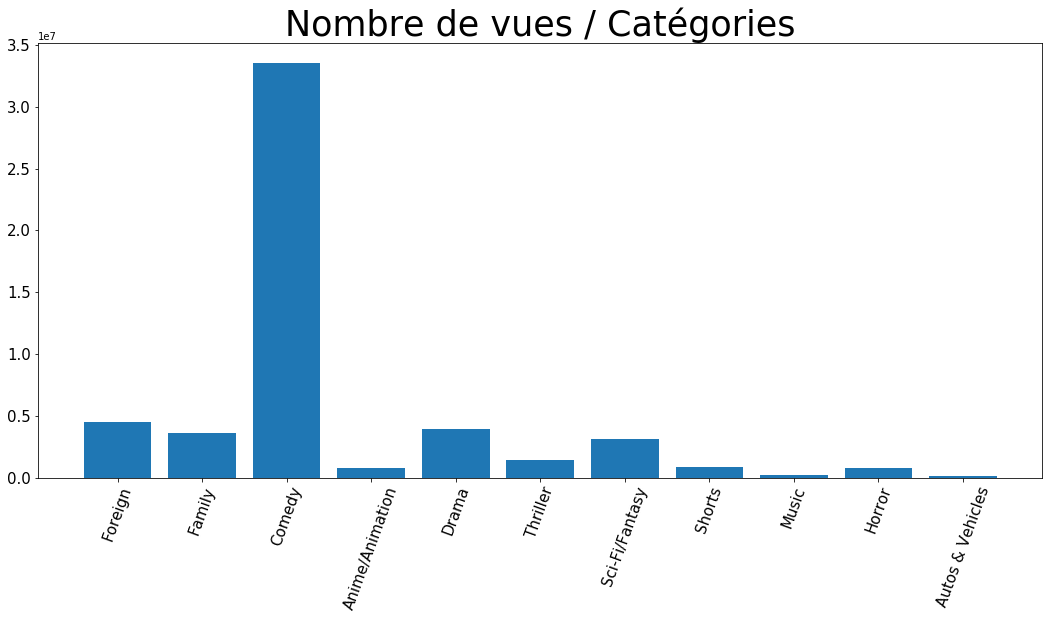

In [17]:
plt.figure(figsize=(18,8))

plt.bar(df["category"], df["views"])
plt.xticks(rotation=70, size=15)
plt.yticks(size=15)

plt.title("Nombre de vues / Catégories", size=35)

plt.show()

### Likes / Catégories

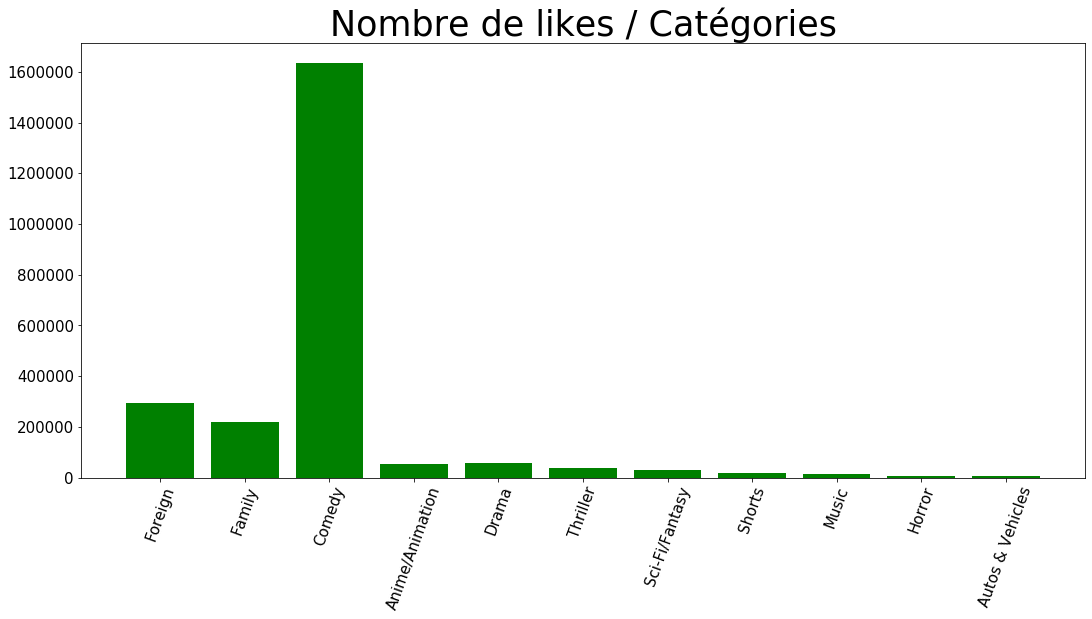

In [18]:
plt.figure(figsize=(18,8))

plt.bar(df["category"], df["likes"], color="g")
plt.xticks(rotation=70, size=15)
plt.yticks(size=15)

plt.title("Nombre de likes / Catégories", size=35)

plt.show()

### Dislikes / Catégories

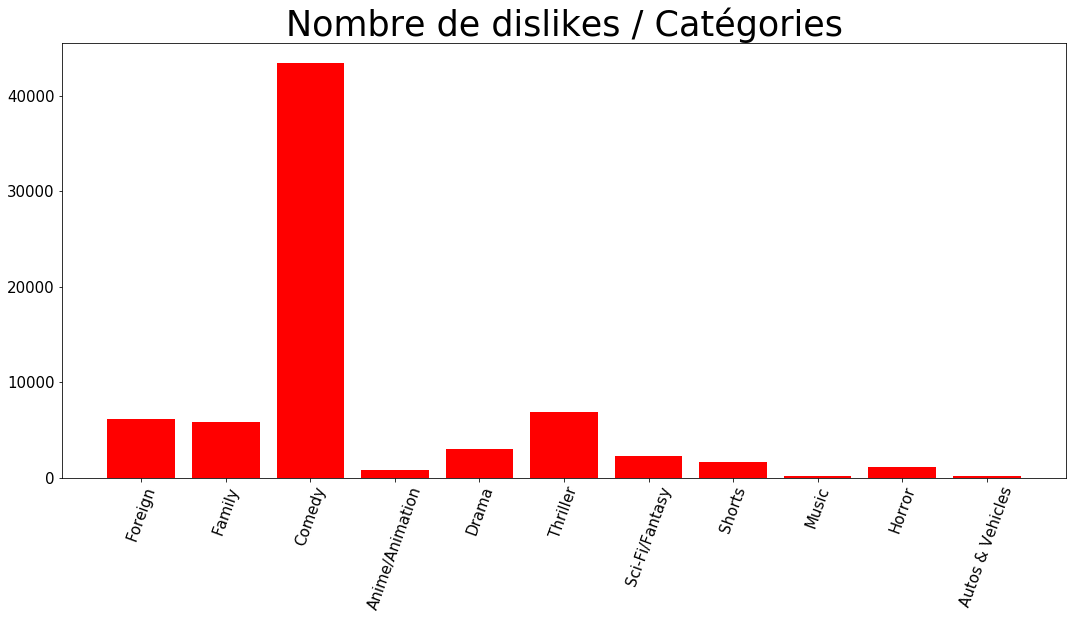

In [19]:
plt.figure(figsize=(18,8))

plt.bar(df["category"], df["dislikes"], color="r")
plt.xticks(rotation=70, size=15)
plt.yticks(size=15)

plt.title("Nombre de dislikes / Catégories", size=35)

plt.show()

### Comments / Catégories

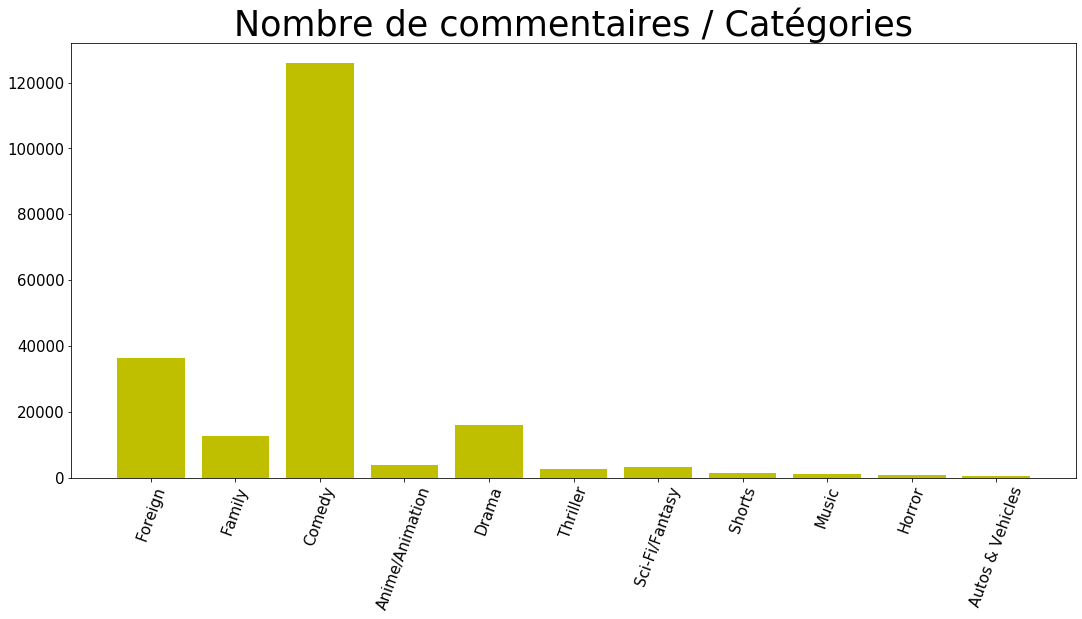

In [20]:
plt.figure(figsize=(18,8))

plt.bar(df["category"], df["comment_count"], color="y")
plt.xticks(rotation=70, size=15)
plt.yticks(size=15)

plt.title("Nombre de commentaires / Catégories", size=35)

plt.show()

In [21]:
df = df.iloc[0:200, :]

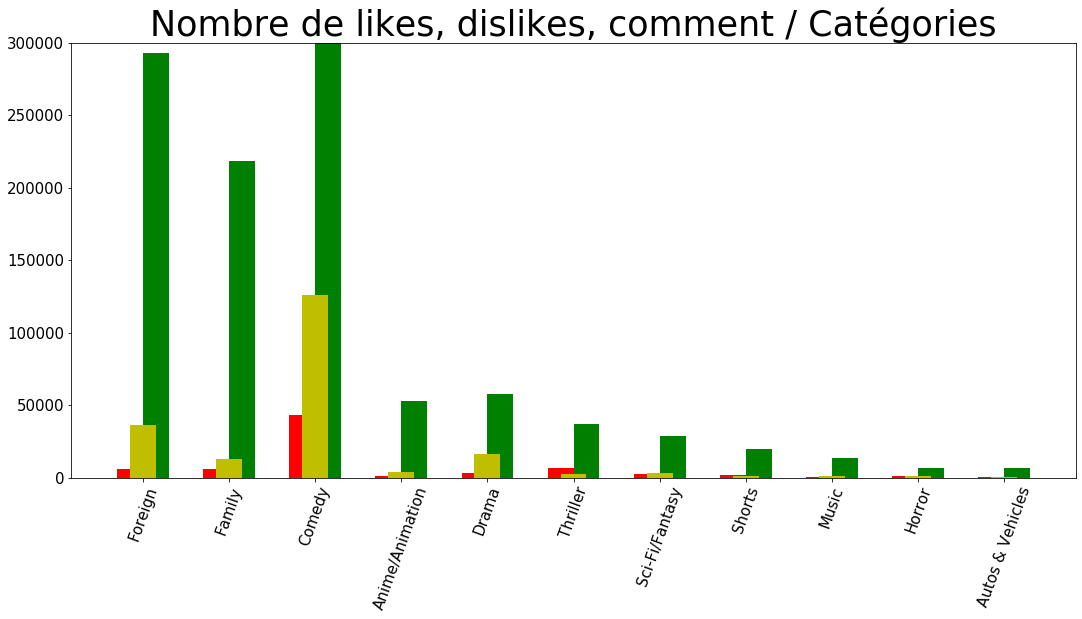

In [22]:
plt.figure(figsize=(18,8))

#plt.bar(df["category"], df["views"])
plt.bar(df["category"], df["likes"], width=0.3, align="edge", color="g")
plt.bar(df["category"], df["dislikes"], width=-0.3, align="edge", color="r")
plt.bar(df["category"], df["comment_count"], width=0.3, align="center", color="y")


plt.xticks(rotation=70, size=15)
plt.yticks(size=15)

plt.ylim(0,300000)

plt.title("Nombre de likes, dislikes, comment / Catégories", size=35)

plt.show()

## Travail sur les mots-clés

In [23]:
tags = data_fr["tags"]
#tags = tags[0:200]
tags

video_id
Ro6eob0LrCY    Raptor"|"Dissident"|"Expliquez"|"moi"|"cette"|...
Yo84eqYwP98                                               [none]
ceqntSXE-10        cartoon"|"pokémon"|"école"|"ours"|"мультфильм
WuTFI5qftCE    Papy grenier"|"Metal Gear Solid"|"PS1"|"Tirage...
ee6OFs8TdEg    vélo"|"vtt"|"bmx"|"freestyle"|"bike"|"mtb"|"di...
                                     ...                        
coVXf3Q9xBk    تنظيم كأس العالم 2026|"كأس العالم 2026"|"المغر...
_umkjOQJvtw    الباكالوريا في المغرب|"صحاب الباك"|"صحاب الباك...
nt25ec7nzIM    RushManga|"rush manga"|"anime a voir"|"UN ANIM...
NlxE_QQMRzg    Նռան հատիկ|"Սերիա 192"|"Pomegranate seed"|"Nra...
_LgKglfnqlc                    ramadan2018|"koorgui"|"Mandoumbé"
Name: tags, Length: 40724, dtype: object

In [24]:
def supprime_accent(ligne):
        """ supprime les accents du texte source """
        accent = ['é', 'è', 'ê', 'à', 'ù', 'û', 'ç', 'ô', 'î', 'ï', 'â']
        sans_accent = ['e', 'e', 'e', 'a', 'u', 'u', 'c', 'o', 'i', 'i', 'a']
        i = 0
        while i < len(accent):
            ligne = ligne.replace(accent[i], sans_accent[i])
            i += 1
        return ligne

In [25]:
#data_fr = data_fr.iloc[0:200,:]
#data_fr.head()

In [26]:
mot = "ecole"
filtre = data_fr["tags"].str.contains(mot)
data_fr[filtre].shape

(43, 16)

In [27]:
a = data_fr["tags"][data_fr.index == "kn-pu9awJaY"].values
print(a)

['pierre"|"croce"|"pierrecroce"|"power"|"point"|"powerpoint"|"slides"|"slide"|"humour"|"graphiques"|"graphique"|"schéma"|"schémas"|"diapos"|"diapositives"|"diapo"|"diapositive"|"funny"|"marrante"|"drole"|"vidéo"|"vidéos"|"youtubeur"|"lol"|"fun"|"comedie"|"comedy"|"comedien"|"spectacle"|"participation"|"votre"|"vous"|"abonnés']


In [ ]:
for x, y in data_fr["tags"].items():
    y = y.lower()
    result = supprime_accent(y)
#    result = result.split('"|"')
#    print(result)
    data_fr[data_fr["tags"] == x] = result
data_fr

In [ ]:
dico_tags = {}
for x in tags:
    
    x = x.split('"|"')
    for x in x:
        if x in dico_tags.keys():
            dico_tags[x] += 1
        else:
            dico_tags[x] = 1

In [ ]:
len(dico_tags.keys())

In [ ]:
dico_tags_sorted = sorted(dico_tags.items(),key=lambda c:c[1], reverse=True)
dico_tags_sorted

In [ ]:
dico_tags.sort()

In [ ]:
for key, val in sorted(dico_tags, key=dico_tags.values()):
    print(key, val)


#sorted(dico_tags.values(), reverse=True)